In [1]:
from pymongo import MongoClient

In [2]:
client = MongoClient('localhost', 27017)
db = client.maniva_db
collection = db.maniva_webapp_contact

In [42]:
corpus = list()
message_len = list()

for entry in collection.find({},{'subject','message'}):
    corpus.append(entry['subject'])
    corpus.append(entry['message'])
    message_len.append(len(entry['message']))

print(corpus[:6])

['Python', 'What are the programming languages that your company is working with?', 'Questions concerning the cloud', 'Do we have cloud options for big data that can allow us to properly deploy the model in real-world settings', 'Languages', 'What are the languages that are available for Python and data analytics?']


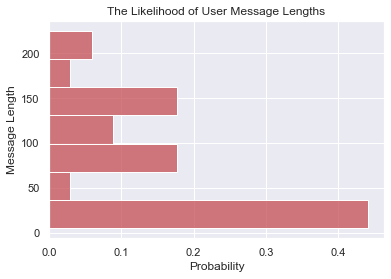

In [86]:
sns.set_theme(style="darkgrid")
ax=sns.histplot(y=message_len, color='r', stat='probability')
ax.set(xlabel='Probability', ylabel='Message Length',title='The Likelihood of User Message Lengths')
plt.show()

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(corpus)

In [39]:
features = vectorizer.get_feature_names()
print(features)

['allow', 'analytics', 'apply', 'area', 'available', 'backend', 'best', 'better', 'big', 'boost', 'bring', 'building', 'business', 'choosin', 'closer', 'cloud', 'cms', 'comes', 'company', 'concerning', 'concerns', 'considering', 'consultation', 'consultations', 'consulting', 'crm', 'customer', 'data', 'database', 'databases', 'deep', 'depend', 'deploy', 'deployed', 'developers', 'development', 'difference', 'differences', 'different', 'difficulty', 'django', 'does', 'don', 'engagement', 'experience', 'feel', 'flask', 'frameworks', 'free', 'fresh', 'frontend', 'getting', 'graph', 'handles', 'hard', 'hello', 'help', 'improve', 'improving', 'javascript', 'js', 'keras', 'know', 'languages', 'learning', 'let', 'like', 'looking', 'machine', 'mainly', 'management', 'migrate', 'migrating', 'model', 'models', 'mongo', 'necessary', 'need', 'needs', 'neo4j', 'new', 'node', 'nosql', 'older', 'options', 'past', 'possible', 'programming', 'project', 'properly', 'provide', 'python', 'questions', 'rea

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white', color_codes=True)

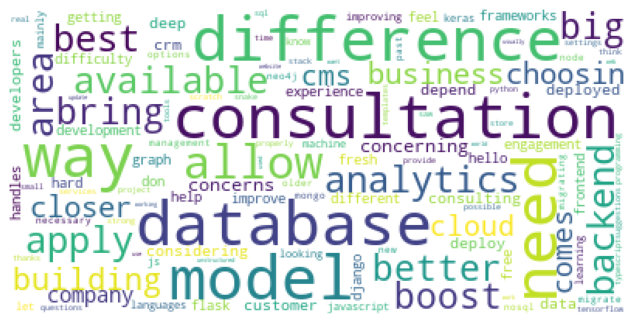

In [38]:
from wordcloud import WordCloud

s = ', '.join(features)
wordcloud = WordCloud().generate(s)
wordcloud = WordCloud(background_color='white',max_words=len(features),max_font_size=40).generate(s)
plt.figure(figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(wordcloud)
plt.axis('off')
plt.show()